<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Projet Econométrique </font></center></b>
<b><center><font size="6"> Value at Risk </font></center></b>    

    
<g><h7><center> Océanne Goumeni - KAFFAF Hicham   </center></h7></g>




<b><center><font size="5">M1 - 2022-2023</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

1. Importation de la base de données .

In [1]:
import pandas as pd 
import numpy as np

chemin = 'C:/Users/kaffa/Music/AF/'
df = pd.read_excel(chemin+'donnees.xls')

df.head()

,Date,condvar,rdt
0,2018-05-04,0.002924,-0.022297
1,2018-05-05,0.002591,0.002732
2,2018-05-06,0.002233,-0.030103
3,2018-05-07,0.002101,-0.017371
4,2018-05-08,0.001891,-0.012743


<span style='line-height:1.5;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">



In [2]:
# On garde que les observation de l'année 2022


df['Date'] = pd.to_datetime(df['Date'])

# Définir les bornes de la période souhaitée
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-01-01')

# Filtrer les observations en fonction des dates
df2022 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


df2022.head()

,Date,condvar,rdt
1338,2022-01-01,0.001326,0.030115
1339,2022-01-02,0.001343,0.007639
1340,2022-01-03,0.001229,-0.036919
1341,2022-01-04,0.001364,-0.009081
1342,2022-01-05,0.001256,-0.066074


<span style='line-height:1.5;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

2. Calcul de la VaR paramétrique.

In [3]:
moyenne = np.mean(df2022['rdt'])
print("Moyenne :", moyenne)

# Calculer la variance
variance = np.var(df2022['rdt'])
print("Variance :", variance)

Moyenne : -0.002021927072417771
Variance : 0.0014784998504201886


In [4]:
import math

Var1 =  moyenne + math.sqrt(variance) * -2.33
print("VaR99 :", Var1)

Var5 =  moyenne + math.sqrt(variance) * -1.645
print("Var95 :", Var5)


VaR99 : -0.09161337665297853
Var95 : -0.06527425950161196


In [5]:
########################
#### test de la VaR ####
########################

# on prend un echantillon de 100 observations 
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-07-09')

# Filtrer les observations en fonction des dates
df_Var = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


df_Var['VarS95'] = Var5
df_Var['VarS99'] = Var1

#on garde que les rendements négatifs
df2 = df_Var[(df_Var["rdt"] < 0)]


# Création de la variable Q
df2['Q'] = np.where(df2['rdt'] < df2["VarS95"], 1, 0)

# Création de la variable Z
df2['Z'] = np.where(df2['rdt'] < df2["VarS99"], 1, 0)

df3 = df2[(df2['Q'] == 1) | (df2['Z'] == 1)]
df3.head(50)


C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\1142346606.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Var['VarS95'] = Var5
C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\1142346606.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Var['VarS99'] = Var1
C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\1142346606.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Date,condvar,rdt,VarS95,VarS99,Q,Z
1466,2022-05-09,0.001729,-0.171630,-0.065274,-0.091613,1,1
1468,2022-05-11,0.005900,-0.167931,-0.065274,-0.091613,1,1
1483,2022-05-26,0.001993,-0.065890,-0.065274,-0.091613,1,0
1501,2022-06-13,0.001881,-0.140032,-0.065274,-0.091613,1,1
1504,2022-06-16,0.003730,-0.107831,-0.065274,-0.091613,1,1
1506,2022-06-18,0.004365,-0.091355,-0.065274,-0.091613,1,0


<span style='line-height:1.5;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

3. Calcul de la VaR de Cornish-Fischer.

In [6]:
from scipy.stats import skew, kurtosis

moyenne = np.mean(df2022['rdt'])
print("Moyenne :", moyenne)

# Calculer la variance
variance = np.var(df2022['rdt'])
print("Variance :", variance)

#écart-type
ec = math.sqrt(variance)
print("écart-type :", ec)

# Calcul de la skewness
skew = skew(df2022['rdt'])
print("Skewness:", skew)

# Calcul de la kurtosis
kurt = kurtosis(df2022['rdt'])
print("Kurtosis:", kurt)

Moyenne : -0.002021927072417771
Variance : 0.0014784998504201886
écart-type : 0.03845126591440376
Skewness: -0.867982315809775
Kurtosis: 4.37762185168578


In [7]:
# calcul de la var de cornish-fisher

t= -2.33
c= -1.645

CFVar99 = moyenne + ec * (t + (skew / 6) * (t**2 - 1) + ((kurt + 3) / 24) * (t**3 - 3 * t) - ((skew**2) / 36) * (2 * t**3 - 5 * t))
CFVar95 = moyenne + ec * (c + (skew / 6) * (c**2 - 1) + ((kurt + 3) / 24) * (c**3 - 3 * c) - ((skew**2) / 36) * (2 * c**3 - 5 * c))  

print("Au seuil de 99% la VaR de Cornish-Fisher est égale à :", CFVar99)
print("Au seuil de 95% la VaR de Cornish-Fisher est égale à :", CFVar95)


########################
###Test de la VaR ######
########################

# on prend un echantillon de 100 observations 
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-07-09')

# Filtrer les observations en fonction des dates
df100 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


dfcf = df100[["Date", "rdt"]].copy()
dfcf['CFVar99'] = CFVar99
dfcf['CFVar95'] = CFVar95

#garder que les rdt négatifs
df_negative_rdt = dfcf[dfcf['rdt'] < 0]

# Création de la variable Q
df_negative_rdt['Q'] = np.where(df_negative_rdt['rdt'] < df_negative_rdt["CFVar99"], 1, 0)

# Création de la variable Z
df_negative_rdt['Z'] = np.where(df_negative_rdt['rdt'] < df_negative_rdt["CFVar95"], 1, 0)

# garder que les variables où Q=1 et Z=1
df5 = df_negative_rdt[(df_negative_rdt['Q'] == 1) | (df_negative_rdt['Z'] == 1)]

df_negative_rdt.head()

df5.head(100)


Au seuil de 99% la VaR de Cornish-Fisher est égale à : -0.1721592665346068
Au seuil de 95% la VaR de Cornish-Fisher est égale à : -0.06850259218053364


C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\4288757760.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative_rdt['Q'] = np.where(df_negative_rdt['rdt'] < df_negative_rdt["CFVar99"], 1, 0)
C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\4288757760.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative_rdt['Z'] = np.where(df_negative_rdt['rdt'] < df_negative_rdt["CFVar95"], 1, 0)


,Date,rdt,CFVar99,CFVar95,Q,Z
1466,2022-05-09,-0.171630,-0.172159,-0.068503,0,1
1468,2022-05-11,-0.167931,-0.172159,-0.068503,0,1
1501,2022-06-13,-0.140032,-0.172159,-0.068503,0,1
1504,2022-06-16,-0.107831,-0.172159,-0.068503,0,1
1506,2022-06-18,-0.091355,-0.172159,-0.068503,0,1


<span style='line-height:2;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .7px solid black;">

4. Calcul de la VaR paramétrique en utilisant les variances conditionnelles.

In [8]:
# moyenne en fenetre roulantes

df['moyenne_mobile'] = df['rdt'].rolling(window=2).mean()

# Afficher les résultat
df.dropna(inplace=True)
df.head()

,Date,condvar,rdt,moyenne_mobile
1,2018-05-05,0.002591,0.002732,-0.009783
2,2018-05-06,0.002233,-0.030103,-0.013686
3,2018-05-07,0.002101,-0.017371,-0.023737
4,2018-05-08,0.001891,-0.012743,-0.015057
5,2018-05-09,0.001698,0.080301,0.033779


In [9]:
#################################################
####Calcul de la VaR pour chaque observation ####
#################################################

for i in range(2, len(df)):
    df.at[i, 'var99'] = df.at[i, 'moyenne_mobile'] + math.sqrt(df.at[i, 'condvar']) * -2.33
    df.at[i, 'var95'] = df.at[i, 'moyenne_mobile'] + math.sqrt(df.at[i, 'condvar']) * -1.645

    
df.head()

,Date,condvar,rdt,moyenne_mobile,var99,var95
1,2018-05-05,0.002591,0.002732,-0.009783,NaN,NaN
2,2018-05-06,0.002233,-0.030103,-0.013686,-0.123801,-0.091428
3,2018-05-07,0.002101,-0.017371,-0.023737,-0.130531,-0.099135
4,2018-05-08,0.001891,-0.012743,-0.015057,-0.116391,-0.086599
5,2018-05-09,0.001698,0.080301,0.033779,-0.062229,-0.034004


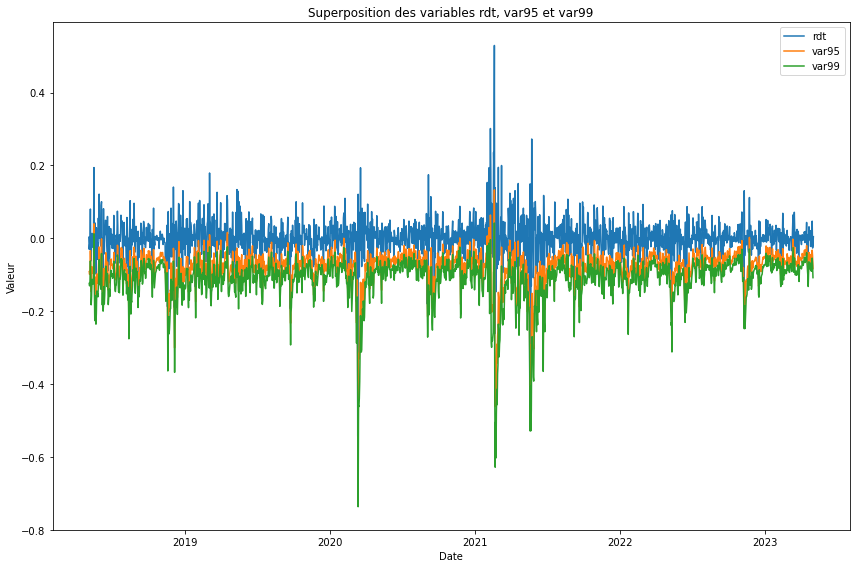

In [10]:

import matplotlib.pyplot as plt

# Créer le graphique
plt.figure(figsize=(12, 8))  # Définir la taille du graphique

# Tracer les courbes pour chaque variable
plt.plot(df['Date'], df['rdt'], label='rdt')
plt.plot(df['Date'], df['var95'], label='var95')
plt.plot(df['Date'], df['var99'], label='var99')

# Définir les étiquettes des axes et le titre du graphique
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Superposition des variables rdt, var95 et var99')

# Afficher la légende
plt.legend()

# Ajuster les positions des axes pour les inclure dans l'image
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\1401933558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['var95'] = df['var95']
C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\1401933558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['var99'] = df['var99']


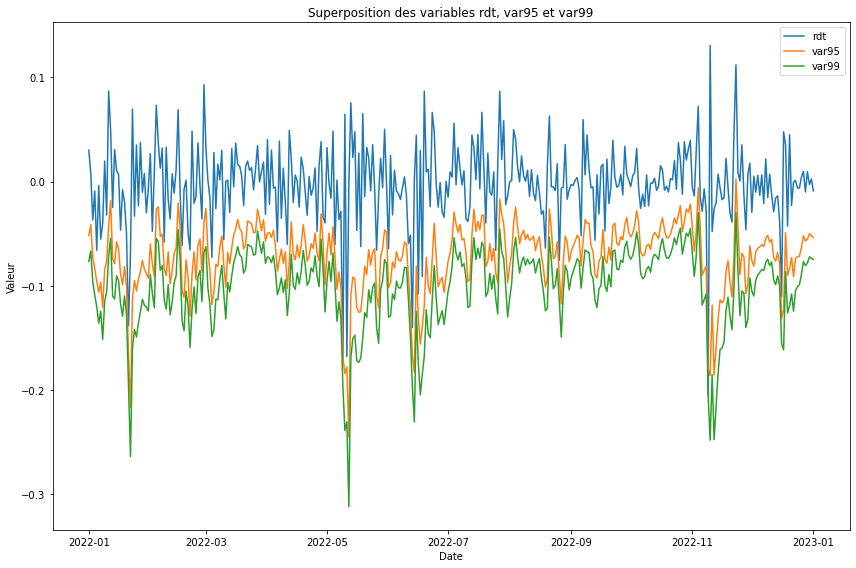

In [11]:
# Créer le graphique
plt.figure(figsize=(12, 8))  # Définir la taille du graphique

df2022['var95'] = df['var95']
df2022['var99'] = df['var99']

# Tracer les courbes pour chaque variable
plt.plot(df2022['Date'], df2022['rdt'], label='rdt')
plt.plot(df2022['Date'], df2022['var95'], label='var95')
plt.plot(df2022['Date'], df2022['var99'], label='var99')

# Définir les étiquettes des axes et le titre du graphique
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Superposition des variables rdt, var95 et var99')

# Afficher la légende
plt.legend()

# Ajuster les positions des axes pour les inclure dans l'image
plt.tight_layout()

# Afficher le graphique
plt.show()

In [22]:
df22 = df2022[["Date", "rdt", "var99" ,"var95"]].copy()

#garder que les rdt négatifs
df_negative = df22[df22['rdt'] < 0]

# Création de la variable Q
df_negative['Q'] = np.where(df_negative['rdt'] < df_negative["var99"], 1, 0)

# Création de la variable Z
df_negative['Z'] = np.where(df_negative['rdt'] < df_negative["var95"], 1, 0)

# garder que les variables où Q=1 et Z=1
df6 = df_negative[(df_negative['Q'] == 1) | (df_negative['Z'] == 1)]

df_negative.head()

df6.head(100)


C:\Users\kaffa\AppData\Local\Temp\ipykernel_1532\2486706313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Q'] = np.where(df_negative['rdt'] < df_negative["var99"], 1, 0)
C:\Users\kaffa\AppData\Local\Temp\ipykernel_1532\2486706313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Z'] = np.where(df_negative['rdt'] < df_negative["var95"], 1, 0)


,Date,rdt,var99,var95,Q,Z
1466,2022-05-09,-0.17163,-0.196963,-0.168480,0,1
1650,2022-11-09,-0.20537,-0.206648,-0.180208,0,1


<span style='line-height:2;font-size: 18px;font-family:"Times New Roman"'>
<hr style=" border: .7px solid black;">

5. Calcul de la VaR de Cornish-Fisher en utilisant les variances conditionnelles.

In [12]:
import pandas as pd
from scipy.stats import skew, kurtosis

df = df2022[["Date", "rdt", "condvar"]].copy()

# Calculer le skewness avec une fenêtre roulante de taille 4
df["skew"] = df['rdt'].rolling(window=4).apply(skew)

# Calculer le kurtosis avec une fenêtre roulante de taille 4
df["kurt"] = df['rdt'].rolling(window=4).apply(kurtosis)

# moyenne avec une fenêtre roulante de taille 4
df['moyenne'] = df['rdt'].rolling(window=4).mean()

df.dropna(inplace=True)
df

,Date,rdt,condvar,skew,kurt,moyenne
1341,2022-01-04,-0.009081,0.001364,-0.144682,-1.213273,-0.002062
1342,2022-01-05,-0.066074,0.001256,-0.246587,-1.402111,-0.026109
1343,2022-01-06,-0.003757,0.001879,-0.452280,-1.387791,-0.028958
1344,2022-01-07,-0.055357,0.001660,-0.042458,-1.907194,-0.033567
1345,2022-01-08,-0.039963,0.001993,0.665269,-1.056137,-0.041288
...,...,...,...,...,...,...
1699,2022-12-28,-0.010004,0.001193,0.082815,-1.675279,-0.000505
1700,2022-12-29,0.009530,0.001121,-0.925170,-0.884124,0.003409
1701,2022-12-30,-0.002846,0.001054,-0.257729,-1.663367,0.001613
1702,2022-12-31,0.002316,0.000991,0.005047,-1.244069,-0.000251


In [13]:
#création d'une boucle pour calculer la VaR à chaque instant
t = -2.33
c = -1.645
for i in range(1341,1703 ):
    
    
    df.at[i, 'var99'] = df.at[i, 'moyenne'] + math.sqrt(df.at[i, 'condvar']) * (t + (df.at[i, 'skew'] / 6) * (t**2 - 1) + ((df.at[i, 'kurt'] + 3) / 24) * (t**3 - 3 * t) - ((df.at[i, 'skew']**2) / 36) * (2 * t**3 - 5 * t))
    df.at[i, 'var95'] = df.at[i, 'moyenne'] + math.sqrt(df.at[i, 'condvar']) * (c + (df.at[i, 'skew'] / 6) * (c**2 - 1) + ((df.at[i, 'kurt'] + 3) / 24) * (c**3 - 3 * c) - ((df.at[i, 'skew']**2) / 36) * (2 * c**3 - 5 * c))
    
dfcf = df[["Date", "rdt", "var99","var95"]].copy()

#garder que les rdt négatifs
df3 = dfcf[(dfcf["rdt"] < 0)]


# Création de la variable Q
df3['Q'] = np.where(df3['rdt'] < df3["var99"], 1, 0)

# Création de la variable Z
df3['Z'] = np.where(df3['rdt'] < df3["var95"], 1, 0)

# garder que les variables où Q=1 et Z=1
df3 = df3[(df3['Q'] == 1) | (df3['Z'] == 1)]
df3.head()

    

C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\2828106385.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Q'] = np.where(df3['rdt'] < df3["var99"], 1, 0)
C:\Users\kaffa\AppData\Local\Temp\ipykernel_17128\2828106385.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Z'] = np.where(df3['rdt'] < df3["var95"], 1, 0)


,Date,rdt,var99,var95,Q,Z
1358,2022-01-21,-0.138559,-0.190502,-0.132963,0,1
1466,2022-05-09,-0.171630,-0.192535,-0.136349,0,1
1650,2022-11-09,-0.205370,-0.191769,-0.140292,1,1
1687,2022-12-16,-0.110596,-0.155881,-0.109240,0,1


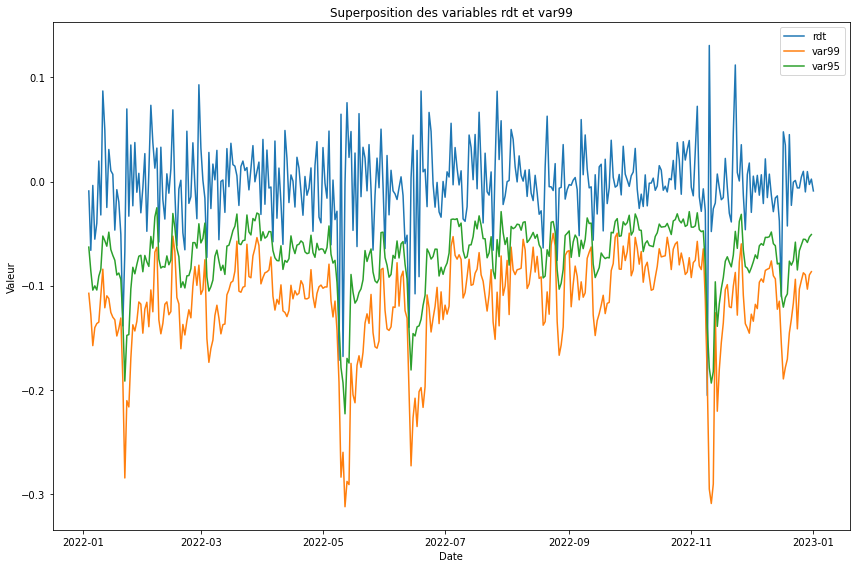

In [14]:
# Créer le graphique
plt.figure(figsize=(12, 8))  # Définir la taille du graphique

# Tracer les courbes pour chaque variable
plt.plot(df['Date'], df['rdt'], label='rdt')
plt.plot(df['Date'], df['var99'], label='var99')
plt.plot(df['Date'], df['var95'], label='var95')

# Définir les étiquettes des axes et le titre du graphique
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Superposition des variables rdt et var99')

# Afficher la légende
plt.legend()

# Ajuster les positions des axes pour les inclure dans l'image
plt.tight_layout()

# Enregistrer le graphique en tant qu'image PNG
plt.savefig('cfdynamic.jpg', dpi=300)  # Spécifier le nom de fichier et la résolution DPI

# Afficher le graphique
plt.show()